<a href="https://colab.research.google.com/github/davinavc/Data-Analyst/blob/main/Datacamp/Datacamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
df = pd.read_csv('/content/pet_supplies_2212.csv')

In [ ]:
# Dataset Size
print('Data Size\nRow: %'%df.shape)

(1500, 8)


In [ ]:
# Columns names in dataset
print(df.columns)

Index(['product_id', 'category', 'animal', 'size', 'price', 'sales', 'rating',
       'repeat_purchase'],
      dtype='object')


In [ ]:
# Checking datatypes
print(df.dtypes)

product_id           int64
category            object
animal              object
size                object
price               object
sales              float64
rating             float64
repeat_purchase      int64
dtype: object


In [ ]:
# Show top 5 of data
print(df.head(5))

   product_id  category animal    size  price    sales  rating  \
0           1      Food   Bird   large   51.1  1860.62     7.0   
1           2   Housing   Bird  MEDIUM  35.98   963.60     6.0   
2           3      Food    Dog  medium  31.23   898.30     5.0   
3           4  Medicine    Cat   small  24.95   982.15     6.0   
4           5   Housing    Cat   Small  26.18   832.63     7.0   

   repeat_purchase  
0                1  
1                0  
2                1  
3                1  
4                1  


In [ ]:
# Checking missing value for each columns
print(df.isna().sum())
print(df['repeat_purchase'].nunique())

product_id         0
category           0
animal             0
size               0
price              0
sales              0
rating             0
repeat_purchase    0
dtype: int64
2


In [ ]:
# Fill the missing value in column rating using 0
df['rating'] = df['rating'].fillna(0)
print(df.isna().sum())

product_id         0
category           0
animal             0
size               0
price              0
sales              0
rating             0
repeat_purchase    0
dtype: int64


In [ ]:
# Define a function to categorize sizes into 'Small', 'Medium', or 'Large', or 'Unknown' if not recognized.
def categorize_size (size):
  size = str(size).lower()
  if 'small' in size:
    return 'Small'
  elif 'medium' in size:
    return 'Medium'
  elif 'large' in size:
    return 'Large'
  else:
    return 'Unknown'

# Apply the categorize_size function to the 'size' column of the DataFrame
df['size'] = df['size'].apply(categorize_size)
print(df['size'])

0        Large
1       Medium
2       Medium
3        Small
4        Small
         ...  
1495    Medium
1496     Small
1497     Small
1498     Small
1499    Medium
Name: size, Length: 1500, dtype: object


In [ ]:
# Checking undetected missing value in category column
df_unknown_category = df['category'] == '-'
count_unknown_category = df_unknown_category.sum()
print(count_unknown_category)

25


In [ ]:
# Replace the hyphen to Unknown
df['category'] = df['category'].replace('-','Unknown')
print(df['category'].loc[20:25])

20         Food
21         Food
22      Unknown
23    Equipment
24         Toys
25      Housing
Name: category, dtype: object


In [ ]:
# Replace the unlisted price using median price
df['price'] = df['price'].replace('unlisted', pd.NA)

# Convert the 'price' column to numeric (float)
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Replace any NaN values in the 'price' column with the median price
median_price = df['price'].median()
df['price'].fillna(median_price, inplace=True)
print(df['price'].loc[20:25])

20    28.065
21    41.000
22    32.980
23    22.990
24    38.990
25    45.830
Name: price, dtype: float64


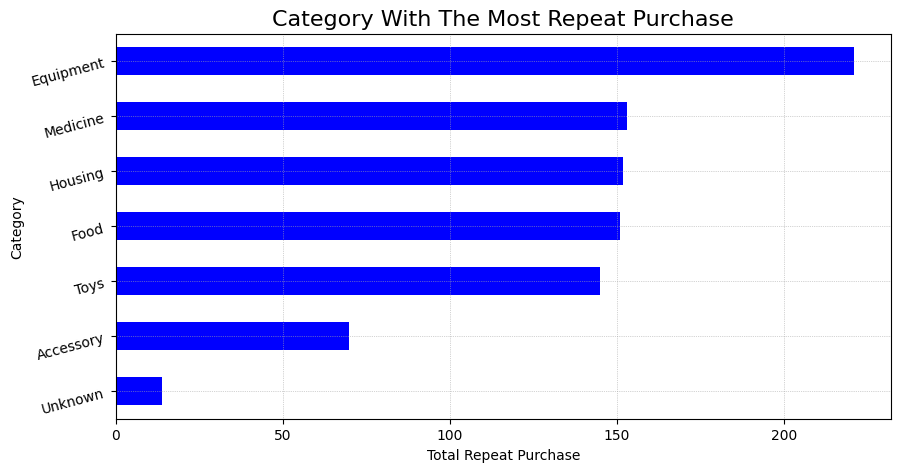

In [ ]:
# Category with the most repeat purchase visualization
plt.figure(figsize=(10, 5))
df[df['repeat_purchase'] > 0].groupby(['category'])['repeat_purchase'].sum().sort_values(ascending=True).plot(kind='barh', color='blue')
plt.title('Category With The Most Repeat Purchase', fontsize=16)
plt.xlabel('Total Repeat Purchase', fontsize=10)
plt.ylabel('Category', fontsize=10)
plt.grid(color='darkgray' ,linestyle=':', linewidth=0.5)
plt.yticks(rotation=15)
plt.show()

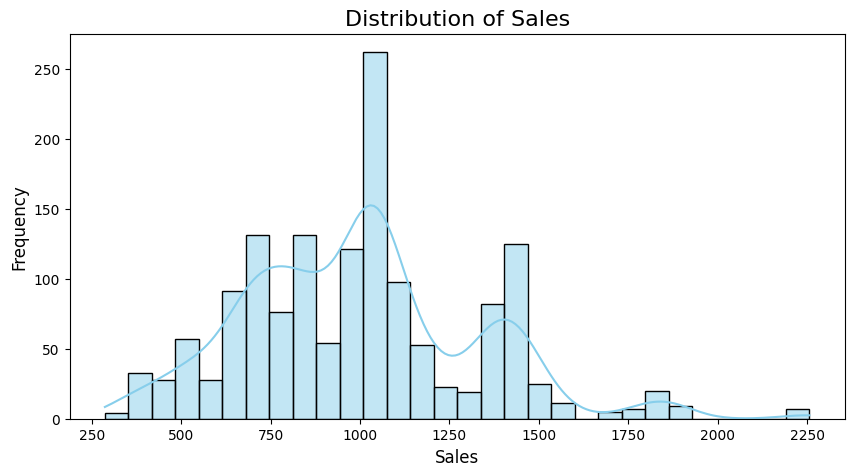

In [ ]:
# Visualization of Distribution of sales
plt.figure(figsize=(10, 5))
sns.histplot(df['sales'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Sales', fontsize=16)
plt.xlabel('Sales', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

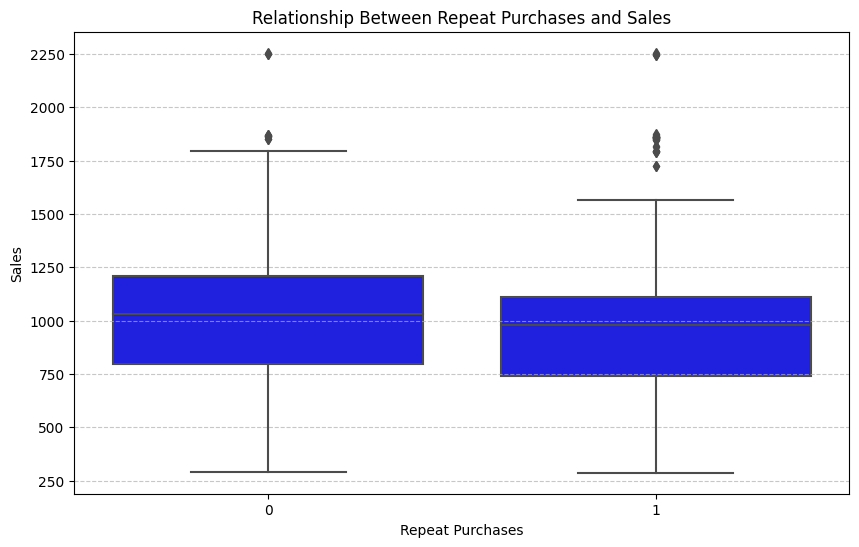

In [152]:
# Visualization of relationship between repeat purchases and sales
plt.figure(figsize=(10, 6))
sns.boxplot(x='repeat_purchase', y='sales', data=df, color='blue')

# Add labels and title
plt.title('Relationship Between Repeat Purchases and Sales')
plt.xlabel('Repeat Purchases')
plt.ylabel('Sales')

# Show the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()